# Comparing time series predictions of the global temperature

By: Sherif Abdulkader Tawfik Abbas
[https://sheriftawfikabbas.github.io/](https://sheriftawfikabbas.github.io/)


![Comparison](Comparison.png)

# Part 1: The basics of time series analysis

- What's a time series?
  - It's a table of values, such as temperature or stock price, that are observed at regular times, such as every hour or every day.
  - Here is a simple time series: temperatures in Celcius in The Neighborhood over 10 days.

| Day         | Temperature |
| ----------- | ----------- |
| 11 May 2022 | 23          |
| 12 May 2022 | 21          |
| 13 May 2022 | 24          |
| 14 May 2022 | 19          |
| 15 May 2022 | 18          |
| 16 May 2022 | 20          |
| 17 May 2022 | 21          |
| 18 May 2022 | 22          |
| 19 May 2022 | 20          |
| 20 May 2022 | 21          |

- One would want to know: what's the temperature after 20 May 2022? Predicting the data values (temperature) in the future is called forecasting.
- Workflow for time series analysis:
  - Step 1: Underst the data (Task 2)
  - Step 2: Identify the right model (Tasks 3, 4, 5, 6, 7)
  - Step 3: Use the best model to forecast future values (Task 8)

- To make the best out of this hands-on project, we need to learn a few concepts before the hands-on tasks.

## Common features in time series data


![Trends and seasons](trends_seasons.png)

- These are three common features in every time series data:
    - Seasons: The regular ups and downs in your data, like in the figure above.
    - Trends: When you find that data is general going upward or downword. In the figure above, there is an upward trend.
    - Cycles: Where there are ups and downs in the data that do not seem to repeat regularly.
- We can observe the above three features by plotting the data, and checking it visually.

## Stationarity

- A stationary time series: it's the time series in which the average and variance do not change; so these statistical properties are *independent of time*. 
- Therefore, a time series with trends is not stationary. An example of such data is in the figure above.
- Non-stationary data are not easy to predict, but stationary data are much easier to predict.
- Therefore, we need to make our time series data stationary before we feed them into statistical models.
- You will learn how to turn non-stationary data into stationary data by using differencing.

## Invertibility

## The dataset

We obtain the dataset from the Github page of John Hopkins Center for System Science and Engineering:

[http://berkeleyearth.lbl.gov/auto/Global/Complete_TAVG_complete.txt](http://berkeleyearth.lbl.gov/auto/Global/Complete_TAVG_complete.txt)


# Part 2: Data exploration and preparation

In [1]:
!pip3 install pmdarima statsmodels sklearn pandas numpy matplotlib xgboost prophet keras

import pmdarima as pm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import TimeSeriesSplit
import pandas as pd
import numpy as np
import datetime
import requests
import warnings

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from sklearn.preprocessing import StandardScaler
from prophet import Prophet
from prophet.plot import plot_plotly, add_changepoints_to_plot
from keras.models import Sequential
from keras.layers import Dense

from keras.optimizers import Adam

warnings.filterwarnings('ignore')

C:\Users\sheri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

df=pd.read_csv('http://berkeleyearth.lbl.gov/auto/Global/Complete_TAVG_complete.txt', 
               sep='\s+', 
               comment='%',
               lineterminator='\n', header=None)

# df=pd.read_csv('Complete_TAVG_complete.txt', 
#                sep='\s+', 
#                comment='%',
#                lineterminator='\n', header=None)


About the file:
- This file contains monthly data of temperature anomalies taken from 1750 up to January 2022. 
- The anomalies are relative to the average temperature in the period Jan 1951-Dec 1980.
- Temperature anomaly is the recorded temperature minus the average temperature in the above period.
- All units are in celcius.

Let's have a look at how the data looks like, by using the head() method from the DataFrame class:

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1750,1,-1.036,3.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1750,2,-1.677,4.212,-1.166,0.801,NaN,NaN,NaN,NaN,NaN,NaN
2,1750,3,-0.161,3.115,-1.184,0.832,NaN,NaN,NaN,NaN,NaN,NaN
3,1750,4,-0.485,1.958,-1.212,0.838,NaN,NaN,NaN,NaN,NaN,NaN
4,1750,5,-1.848,2.397,-1.524,0.854,NaN,NaN,NaN,NaN,NaN,NaN


We only need the numeric values here, so we convert `d` to a list

Create a new data frame with two columns, which will be our dataset:

In [4]:
dataset = df[[0, 1, 2]]

We will need to have only 1 data column, y, with the index being ds

In [5]:
dataset['date'] = pd.to_datetime([str(x) + '-' + str(y).zfill(2) + '-01' for x, y in zip(dataset[0], dataset[1])])

Now let's see what we got:

In [6]:
dataset.head()

,0,1,2,date
0,1750,1,-1.036,1750-01-01
1,1750,2,-1.677,1750-02-01
2,1750,3,-0.161,1750-03-01
3,1750,4,-0.485,1750-04-01
4,1750,5,-1.848,1750-05-01


And let's set the index as `date`, data column as `y`:

In [7]:
dataset=dataset.set_index('date')
dataset.rename(columns={2: 'y'},inplace=True)
del dataset[0]
del dataset[1]
dataset.head()

,y
date,
1750-01-01,-1.036
1750-02-01,-1.677
1750-03-01,-0.161
1750-04-01,-0.485
1750-05-01,-1.848


Let's plot the daily number of deaths


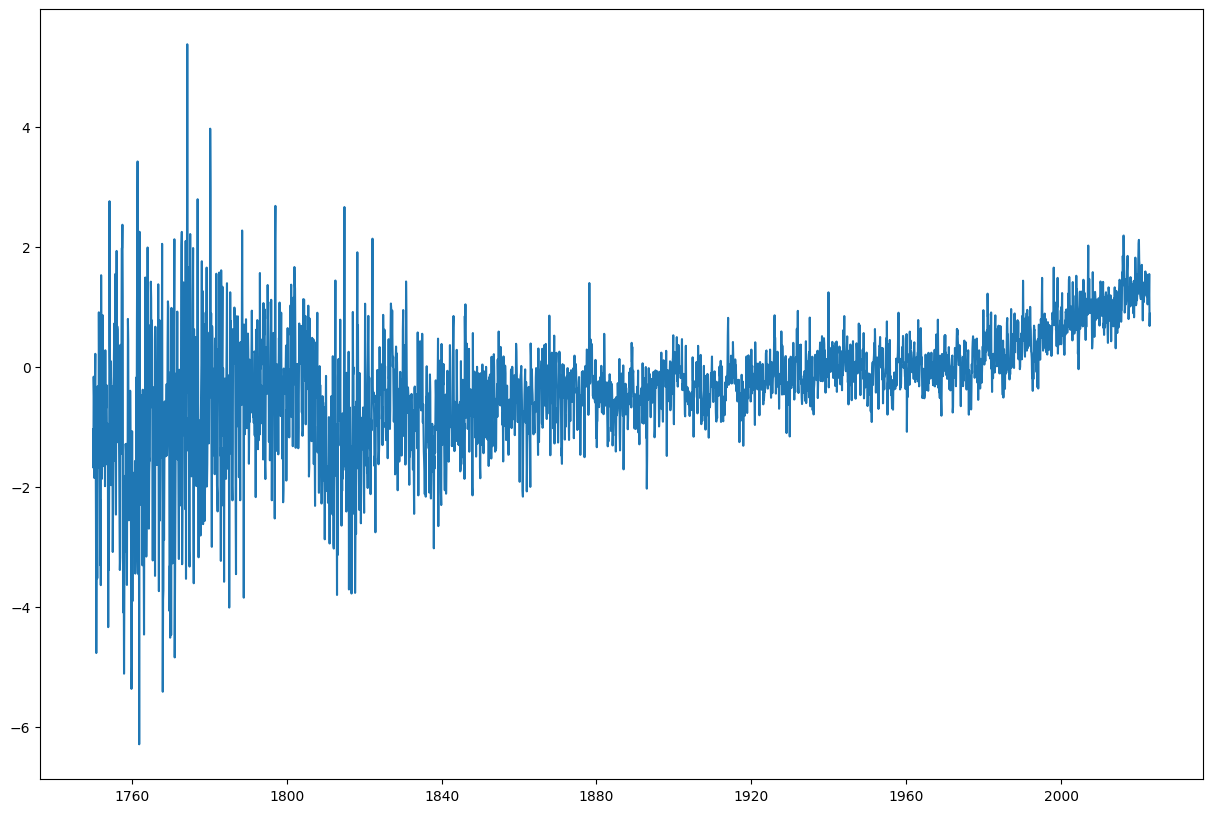

In [8]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(dataset)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.savefig('monthly_anomalies', bbox_inches='tight', transparent=False)

The increase has been tremendous, but it seems to start to plateau. Maybe too early to know? I'd leave that discussion to the scientists in charge.<br>

This time series is obvious non-stationary, and we cannot observe any seasonal behavior here. Let's make it stationary by taking the difference between consecutive elements, which in our case will be the daily change in the number of deaths. To do this, we will use the `diff` method from the Dataframe object.


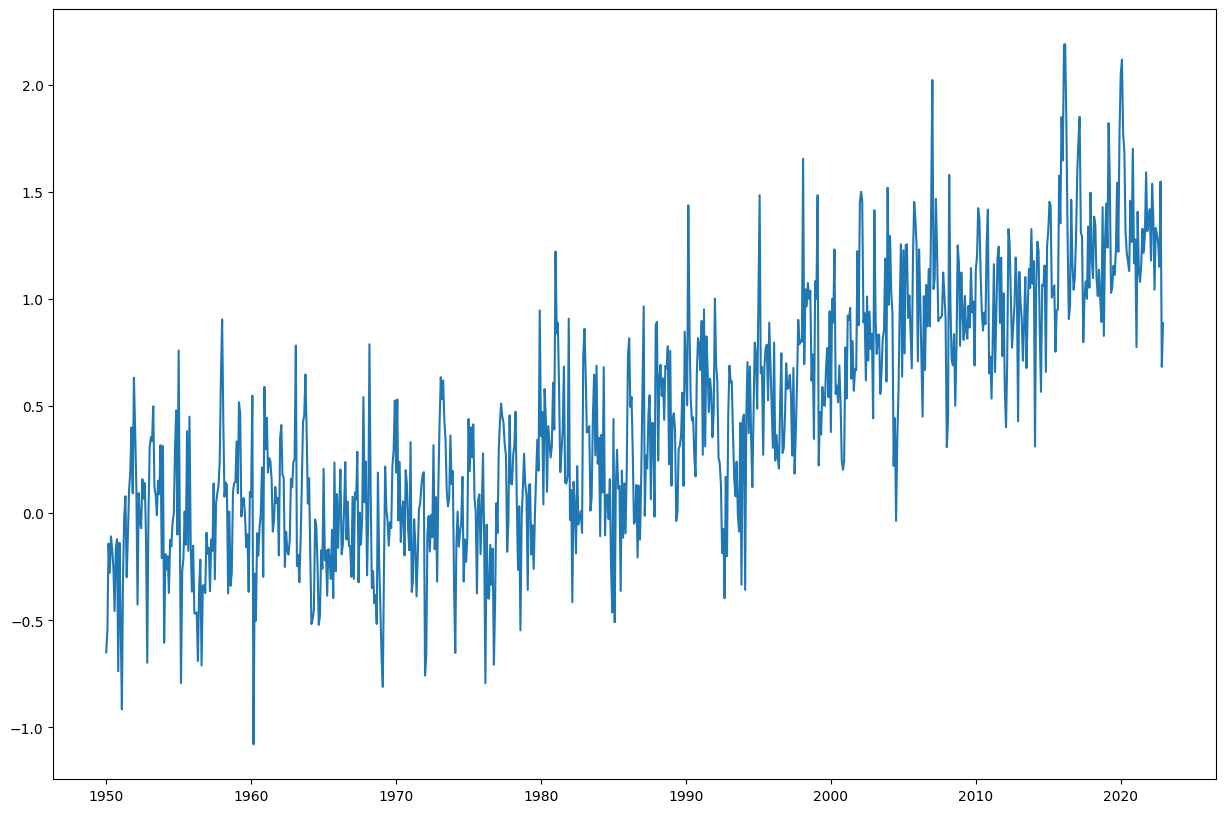

In [32]:
sample = dataset.loc['1950-01-01':'2023-01-01']
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(sample)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.savefig('monthly_anomalies_sample', bbox_inches='tight', transparent=False)

This time series is obvious non-stationary, and we cannot observe any seasonal behavior here. Let's perform seasonal decomposition of the data by using the `seasonal_decompose()` function from `statsmodel`. However, this function doesn't deal with `NaN` values, which we have a few of in the 18th century. So let's only analyse years starting from 1800 by using the pandas query `dataset.loc[dataset.index >= pd.to_datetime('1800-01-01')]`:

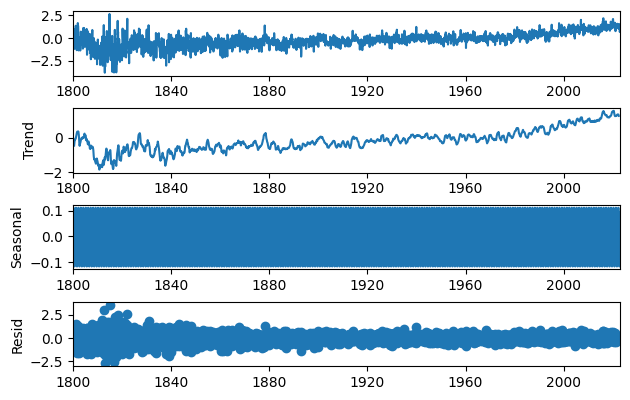

In [33]:
import statsmodels.api as sm
dataset = dataset.loc[dataset.index >= pd.to_datetime('1800-01-01')]
seas_d=sm.tsa.seasonal_decompose(dataset,model='add')
fig=seas_d.plot()
fig.set_figheight(4)
plt.show()

There is a yearly seasonality in the data, and there is also a trend. The anomaly heading upwards, which isn't good!

Therefore, it is not yet stationary, so let's take the `diff()`.

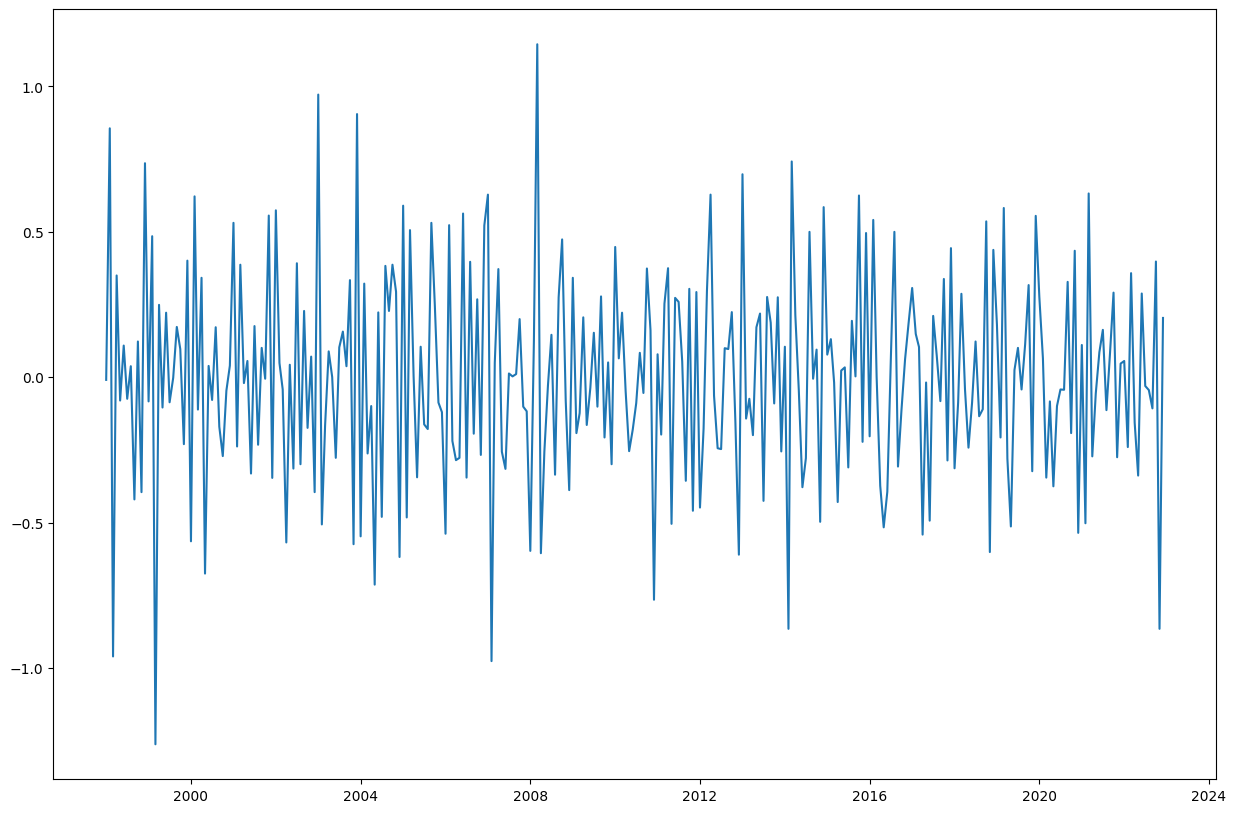

In [34]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(dataset.diff().tail(300))

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.savefig('monthly_anomalies', bbox_inches='tight', transparent=False)

This is clearly stationary enough, and we will be using this for our subsequent analysis.

In [35]:
dataset_diff = dataset.diff()
dataset_diff.head()

,y
date,
1800-01-01,NaN
1800-02-01,-0.052
1800-03-01,-0.381
1800-04-01,1.798
1800-05-01,-1.693


We need to remove the first two data point here, which will be a None value when `diff()` calculates its difference from the non-existing data point before it (there's nothing before it):

In [36]:
dataset_diff = dataset_diff.iloc[1:]
dataset_diff.head()

,y
date,
1800-02-01,-0.052
1800-03-01,-0.381
1800-04-01,1.798
1800-05-01,-1.693
1800-06-01,0.505


Now that we got the diff of the data, and let's say we are going to train models to predict that diff, how can we restore the original data values from a diff? To do that, we use the following procedure:

In [37]:
dataset_diff_inv=dataset.shift(1) + dataset_diff
print(dataset_diff_inv) 

                y
date             
1800-01-01    NaN
1800-02-01 -0.769
1800-03-01 -1.150
1800-04-01  0.648
1800-05-01 -1.045
...           ...
2022-08-01  1.258
2022-09-01  1.151
2022-10-01  1.549
2022-11-01  0.684
2022-12-01  0.888

[2676 rows x 1 columns]


As you can see here: we can restore the `y` based on the values in `diff()`, but we will miss the first value of `y`, which is totally find.

But we are missing something here: even though this method works, it won't work when we want to inverse the `diff()` in forecasted data, because in that case we will not have the `y` of the forecasted data. So what should we do?

An alternative way to inverse the `diff()`, which works for the case of forecasted data, is to use the `np.cumcom()` cummulative summation function.

The first thing to do when using this function is to place the first value of `y` as the first value in `diff()`.

In [39]:
dataset_diff_sub = dataset_diff
dataset_diff_sub.y[0] = dataset.y[0]
dataset_diff_inv=np.cumsum(dataset_diff_sub)
print('dataset_diff_inv',dataset_diff_inv)
print('dataset',dataset)

dataset_diff_inv                 y
date             
1800-02-01 -0.717
1800-03-01 -1.098
1800-04-01  0.700
1800-05-01 -0.993
1800-06-01 -0.488
...           ...
2022-08-01  1.310
2022-09-01  1.203
2022-10-01  1.601
2022-11-01  0.736
2022-12-01  0.940

[2675 rows x 1 columns]
dataset                 y
date             
1800-01-01 -0.717
1800-02-01 -0.769
1800-03-01 -1.150
1800-04-01  0.648
1800-05-01 -1.045
...           ...
2022-08-01  1.258
2022-09-01  1.151
2022-10-01  1.549
2022-11-01  0.684
2022-12-01  0.888

[2676 rows x 1 columns]


- The last step in this task is to split our dataset into a training and a test set. 
- When we train ML models, we typically use 20% of the dataset as a test set.
- In time series analysis, the the size of the test set should be close to the extent of the future data.
- In this exercise, we are only going to predict 1 month into the future. Therefore, we will use all the data before 15 April 2022 as training set.



cutoff_date 2021-01-01
end_date 2022-12-01 00:00:00


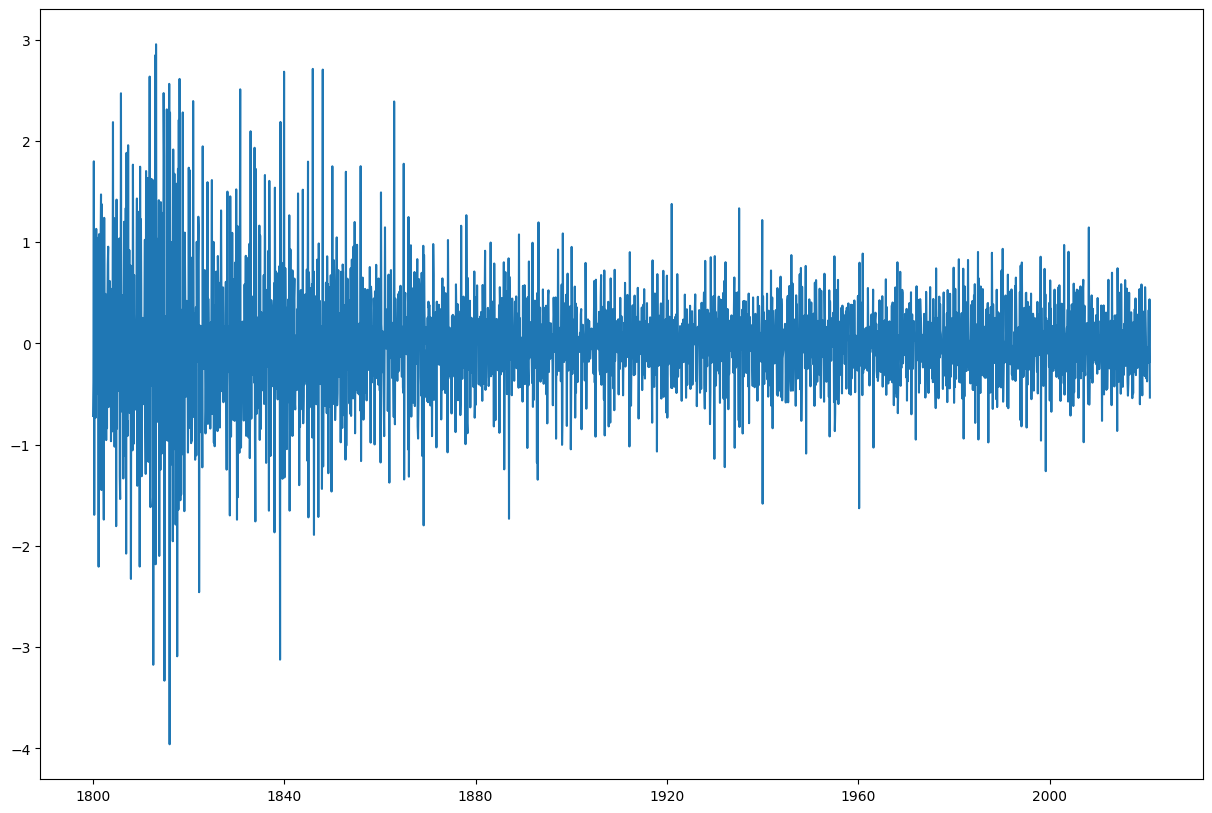

In [50]:
cutoff_date = '2021-01-01'
end_date = dataset_diff.index[-1]
print('cutoff_date',cutoff_date)
print('end_date',end_date)

train = dataset_diff.loc[dataset_diff.index < pd.to_datetime(cutoff_date)]
test = dataset_diff.loc[dataset_diff.index >= pd.to_datetime(cutoff_date)]


fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(train)

plt.savefig('monthly_anomalies_training_set', bbox_inches='tight', transparent=False)

# Task 3: Forcasting using SARIMAX, or Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors model

SARIMAX is one of the time series models in the python statistics library statsmodels.

Now let's talk about SARIMAX.

In [96]:
model = SARIMAX(train, order=(4, 2, 2),seasonal_order=(0,0,0,12))

Next, we call the fit method to optimize the model.

In [97]:
results = model.fit()

Now let's make predictions using the model, and compare those against the values in the test set.

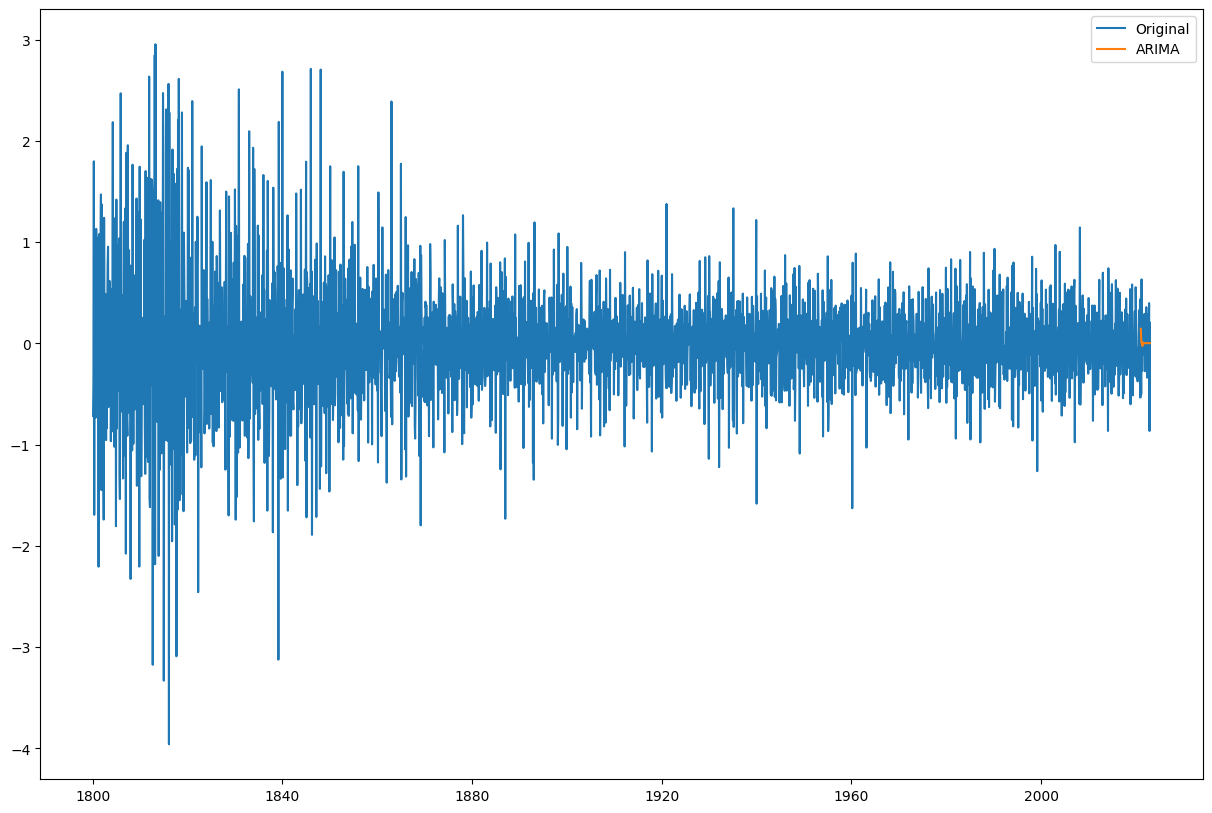

In [98]:
sarimax_prediction = results.predict(
    start=cutoff_date, end=end_date)

fig, ax = plt.subplots(figsize=(15, 10))
l1, = ax.plot(dataset_diff, label='Original')
l2, = ax.plot(sarimax_prediction, label='ARIMA')
plt.legend(handles=[l1, l2])
plt.savefig('SARIMAX_prediction', bbox_inches='tight', transparent=False)

Since that we are interested in comparing between the different time series analysis approaches, we are going to use one of the validation measures: mean absolute error.

In [20]:
print('SARIMAX MAE = ', mean_absolute_error(sarimax_prediction, test))

SARIMAX MAE =  0.25925384412444813


However, in a typical machine learning workflow, we should find the best values of p, q and r that will minimize the error. We can use the auto_arima function in the pmdarima module to do that. This will find the optimal parameter combintation and return the best model. This is going to take a few minutes.


In [21]:
model = pm.auto_arima(train,
                      start_p=1, start_q=1, 
                      d=1, max_d=7,
                      m=12,
                      seasonal=True,
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=6.18 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=7459.200, Time=0.24 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=6164.556, Time=0.73 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=4.68 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=7457.200, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=6185.695, Time=0.17 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=6149.936, Time=2.21 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=10.72 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=2.68 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=7440.659, Time=1.44 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=5566.939, Time=3.07 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=5576.312, Time=0.89 sec
 ARIMA(2,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=14.50 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=3.51 sec
 ARIMA(3,1,0)(2,0,0)[12] intercept   : AIC=5214

Note that this gives us the best mode here: "Best model:  SARIMAX(5,1,0)(2,0,0)[12]". Now let's fit it.

SARIMAX MAE =  0.23943013915193193


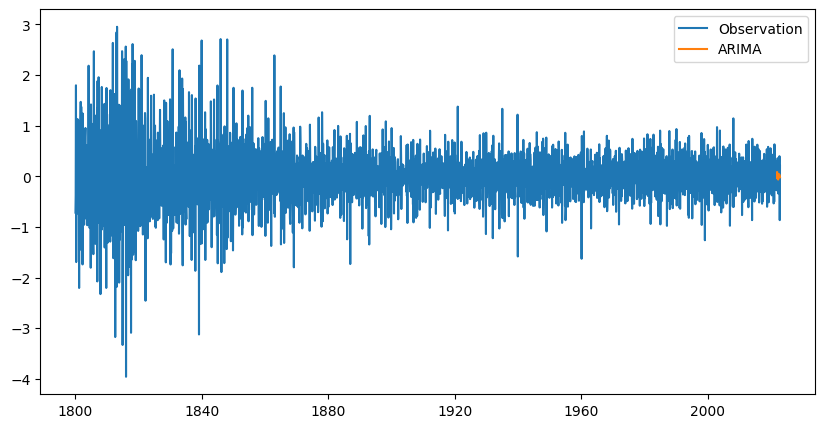

In [22]:
# model = SARIMAX(train, order=(5, 1, 0),seasonal_order=(2,0,0,12))
# results = model.fit()
sarimax_prediction = model.predict(n_periods=test.shape[0])
sarimax_prediction = pd.DataFrame({'ds':test.index,'y':sarimax_prediction})
sarimax_prediction.set_index('ds',inplace=True)

plt.figure(figsize=(10, 5))
l1, = plt.plot(dataset_diff, label='Observation')
l2, = plt.plot(sarimax_prediction, label='ARIMA')
plt.legend(handles=[l1, l2])
plt.savefig('SARIMAX_prediction', bbox_inches='tight', transparent=False)
print('SARIMAX MAE = ', mean_absolute_error(sarimax_prediction, test))

SARIMAX MAE =  0.34210814848669263


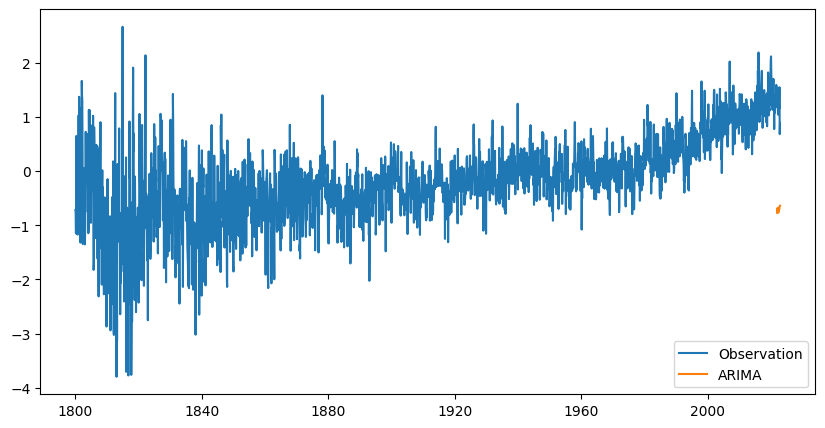

In [23]:
# model = SARIMAX(train, order=(5, 1, 1),seasonal_order=(2,0,1,12))
# results = model.fit()
sarimax_prediction = model.predict(n_periods=test.shape[0])
sarimax_prediction = pd.DataFrame({'ds':test.index,'y':sarimax_prediction})
sarimax_prediction.set_index('ds',inplace=True)

sarimax_prediction = sarimax_prediction.shift(1)
sarimax_prediction.y[0] = dataset.y[train.shape[1]]
sarimax_prediction_inv=np.cumsum(sarimax_prediction)

plt.figure(figsize=(10, 5))
l1, = plt.plot(dataset, label='Observation')
l2, = plt.plot(sarimax_prediction_inv, label='ARIMA')
plt.legend(handles=[l1, l2])
plt.savefig('SARIMAX_prediction_inverse', bbox_inches='tight', transparent=False)
print('SARIMAX MAE = ', mean_absolute_error(sarimax_prediction, test))

In [24]:
sarimax_prediction = model.predict(n_periods=test.shape[0])
sarimax_prediction = pd.DataFrame({'ds':test.index,'y':sarimax_prediction})
sarimax_prediction.set_index('ds',inplace=True)

sarimax_prediction = sarimax_prediction.shift(1)
sarimax_prediction.y[0] = test.y[0]

Let's run the standard diagnostics:

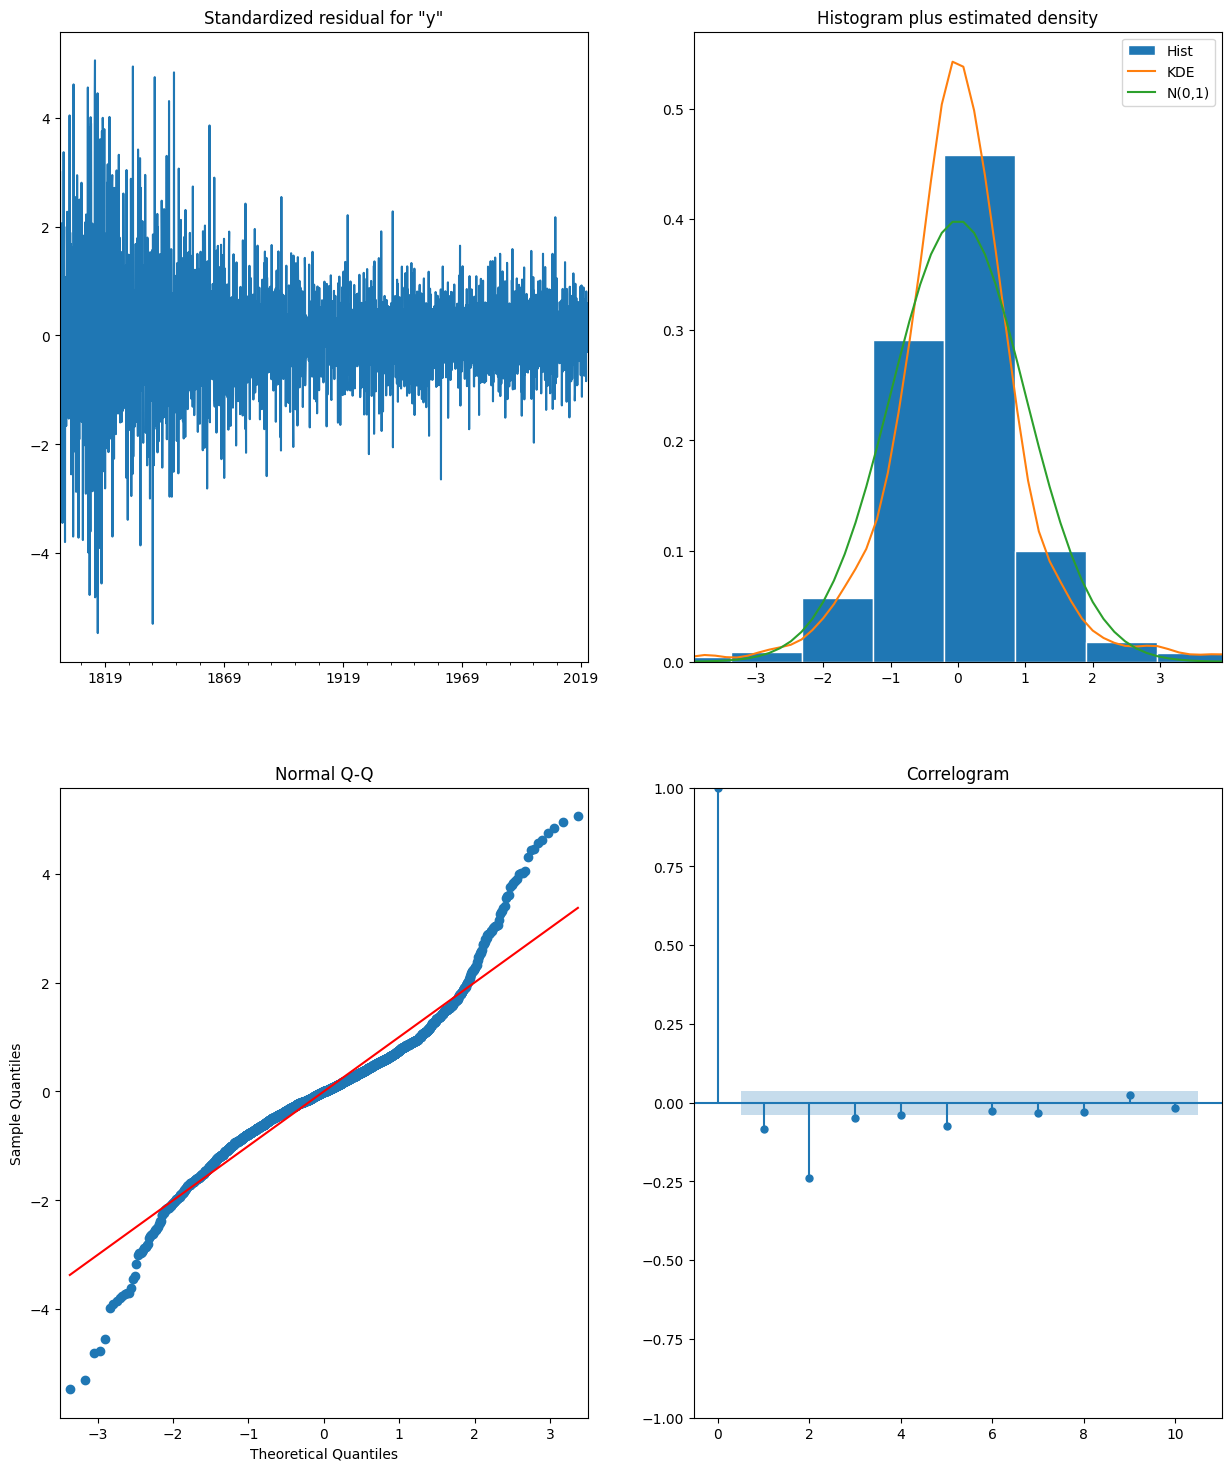

In [25]:
results.plot_diagnostics(figsize=(15, 18))
plt.show()

- The diagnostic plots enable us to analyse the accuracy of our model, and whether there is any (residual) information in the data that should be used to improve the model.
- The package provides four diagnostic plots. Below I only give a very brief description of these plots.
  - Standardized residuals over time plot: Calculates the residue, or the difference between observed and predicted values, as a function of time.
  - Histogram: It's the count of values against the computed residual. Note: that residual in the x-axis was the one in the y-axis in the plot above.
  - Normal Q-Q: Typically, model errors should be normally distributed. This plot checks if this is the case; if the points are nearly linear, then the errors are normally distributed. Which is the case in our plot.
  - Correlogram: Checks the autocorrelation in the data, to ensure that the data is random. 
- *Randomness of data* is a necessary condition for the *validity* of the model, and it is checked by the correlogram.
- In the correlogram, the *autocorrelation* is plotted against *time lags*. If the values are close to zero, then this is an indication of the randomness of the data, as is the case in our plot above.

In [26]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Task 4: Forcasting using Facebook's Prophet model

This is the open source time series library released by Facebook. It is also widely used by Facebook in their own time series analysis tasks. Facebook prophet does not require that you specify or search for hyperparameters. The model can act as a black box that does all the required computations on its own. And it works with the same object-fit-predict API.

Prophet expects the data frame to have 2 columns, unlike SARIMAX.

In [27]:
train['ds'] = train.index.values
test['ds'] = test.index.values

Then we create a new Prophet object and call the `fit()` method

In [29]:
m = Prophet()
m.fit(train)

AttributeError: 'Prophet' object has no attribute 'stan_backend'

- Now let's use the model to generate the predictions for the test set.
- First we create the `future` data frame using `make_future_dataframe()`, then we call the `predict()` function.
- In `make_future_dataframe()`, we pass the `periods` parameter, which is the number of days we want for prediction.

In [147]:
future = m.make_future_dataframe(periods=test.shape[0], freq='MS')
prophet_prediction = m.predict(future)

Now let us calculate the mean absolute error for our predictions.

In [148]:
prophet_prediction.set_index('ds',inplace=True)
test.set_index('ds',inplace=True)
prophet_future = prophet_prediction.yhat.loc[prophet_prediction.index >= cutoff_date]
print('Prophet MAE = ', mean_absolute_error(prophet_future, test))

Prophet MAE =  0.24539575445401615


Next, let's visualize the predictions.

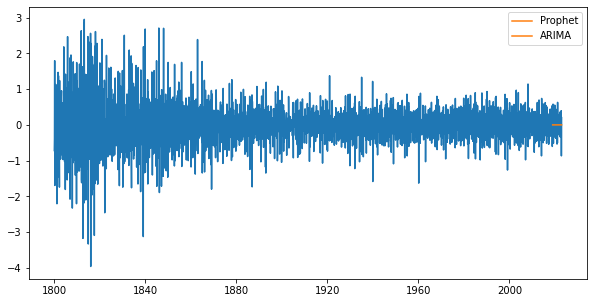

In [149]:
plt.figure(figsize=(10, 5))
l1, = plt.plot(dataset_diff, label='Observation')
l1, = plt.plot(prophet_future, label='Prophet')
plt.legend(handles=[l1, l2])
plt.savefig('Prophet predictions',
            bbox_inches='tight', transparent=False)

# Task 5: Preparing the dataset for XGBOOST and NN

Unlike the prophet and SAIMAX models, the two models we will train in Task 6, namely XGBOOST and NN, are supervised machine learning models that deal with independent data points, or examples. It assumes that each data point is totally independent from the rest of the data points in the dataset.

Here is a method that extracts these features from a given dataframe object.

In [150]:
def featurize(t):
    X = pd.DataFrame()

    X['day'] = t.index.day
    X['month'] = t.index.month
    X['quarter'] = t.index.quarter
    X['dayofweek'] = t.index.dayofweek
    X['dayofyear'] = t.index.dayofyear
    X['weekofyear'] = t.index.weekofyear
    y = t.y
    return X, y


featurize(dataset_diff)[0].head()

,day,month,quarter,dayofweek,dayofyear,weekofyear
0,1,2,1,5,32,5
1,1,3,1,5,60,9
2,1,4,2,1,91,14
3,1,5,2,3,121,18
4,1,6,2,6,152,22


# Task 6: Create training and test datasets by splitting the dataset, and perform data normalization.

In this task we are going to cover two topics in data preparation: splitting the dataset into training and test data, and normalizing the data.

You might have already performed a splitting operation of a dataset in machine learning, where one takes a randomly selected portion of the dataset, say 20%, as a test set, while the remaining 80% is the training set. It is randomly selected because the whole dataset is randomly shufflled before the selection. Another popular approach is the k-fold cross validation.

However, those two methods won't work with time series data. The reason is: when we train the model on the training set, the purpose is to predict the target values in the future, which corresponds to date values that are outside of the date values in the training set.

In [151]:
X_train, y_train = featurize(
    dataset_diff.loc[dataset_diff.index < pd.to_datetime(cutoff_date)])
X_test, y_test = featurize(
    dataset_diff.loc[dataset_diff.index >= pd.to_datetime(cutoff_date)])

Now let's discuss data normalization. We perform data normalization so as to make the range of values of the features, or the columns in the X_train table, as close as possible. For example, we have the features dayofweek and dayofyear. The range of values of dayofweek is from 1 to 7, whereas dayofyear is from 1 to 365. Having such large differences in the ranges of values will either slow down the training of the machine learning model or make it quite difficult. We solve this problem by applying normalization. There are several ways we can normalize the data with. Here I will choose the StandardScaler, which applies the following equation on each of the columns.

z = (x - u) / s

Here x is the column before scaling, u is thee mean and s is the standard deviation. So basically, we subtract the mean of each column from itself, then divide by the standard deviation of that column. To apply StandardScaler, we first fit the scaler object to the dataset:


In [152]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

Apply the scaling to both the training and test sets, as follows.

In [153]:
scaled_train = scaler.transform(X_train)
scaled_test = scaler.transform(X_test)

# Task 7: Train the XGBOOST and NN models

First, create the XGBRegressor object which will represent the XGBOOST regression model.

In [154]:
XGBOOST_model = XGBRegressor(n_estimators=7)


Next, train the XGBOOST regression model using the fit method, and perform prediction using the predict method.

In [155]:
XGBOOST_model.fit(scaled_train, y_train,
                  eval_set=[(scaled_train, y_train), (scaled_test, y_test)],
                  verbose=True)
XGBOOST_prediction = XGBOOST_model.predict(scaled_test)

[0]	validation_0-rmse:0.68547	validation_1-rmse:0.47967
[1]	validation_0-rmse:0.63233	validation_1-rmse:0.41273
[2]	validation_0-rmse:0.60452	validation_1-rmse:0.37769
[3]	validation_0-rmse:0.58931	validation_1-rmse:0.36077
[4]	validation_0-rmse:0.58183	validation_1-rmse:0.35290
[5]	validation_0-rmse:0.57664	validation_1-rmse:0.35244
[6]	validation_0-rmse:0.57361	validation_1-rmse:0.35812


Let us calculate the mean absolute error for the training.

In [156]:
print('XGBOOST MAE = ', mean_absolute_error(XGBOOST_prediction, y_test))

XGBOOST MAE =  0.2779665503975315


Creation and training of the feedforward neural network model.

In [157]:
NN_model = Sequential()
NN_model.add(Dense(20, input_shape=(scaled_train.shape[1],)))
NN_model.add(Dense(10))
NN_model.add(Dense(1))
NN_model.compile(loss='mean_absolute_error', optimizer=Adam(lr=0.001))
NN_model.fit(scaled_train, y_train, validation_data=(
    scaled_test, y_test), epochs=210, verbose=1)
NN_prediction = NN_model.predict(scaled_test)

Epoch 1/210
83/83 [==============================] - 0s 2ms/step - loss: 0.4702 - val_loss: 0.2603
Epoch 2/210
83/83 [==============================] - 0s 1ms/step - loss: 0.4132 - val_loss: 0.2588
Epoch 3/210
83/83 [==============================] - 0s 1ms/step - loss: 0.4135 - val_loss: 0.2601
Epoch 4/210
83/83 [==============================] - 0s 1ms/step - loss: 0.4128 - val_loss: 0.2654
Epoch 5/210
83/83 [==============================] - 0s 1ms/step - loss: 0.4156 - val_loss: 0.2565
Epoch 6/210
83/83 [==============================] - 0s 1ms/step - loss: 0.4117 - val_loss: 0.2576
Epoch 7/210
83/83 [==============================] - 0s 1ms/step - loss: 0.4049 - val_loss: 0.2610
Epoch 8/210
83/83 [==============================] - 0s 1ms/step - loss: 0.4203 - val_loss: 0.2615
Epoch 9/210
83/83 [==============================] - 0s 1ms/step - loss: 0.4089 - val_loss: 0.2624
Epoch 10/210
83/83 [==============================] - 0s 1ms/step - loss: 0.4167 - val_loss: 0.2707
Epoch 11/

Let's compare the MAE values.

In [158]:
print('XGBOOST MAE = ', mean_absolute_error(XGBOOST_prediction, y_test))
print('Prophet MAE = ', mean_absolute_error(prophet_future, test))
print('SARIMAX MAE = ', mean_absolute_error(sarimax_prediction, test))
print('NN MAE = ', mean_absolute_error(NN_prediction, test))


XGBOOST MAE =  0.2779665503975315
Prophet MAE =  0.24539575445401615
SARIMAX MAE =  0.2441074251732318
NN MAE =  0.25976722614191633


The peformance of SARIMAX is the best, while that of XGBOOST is the worst. <br>
Finally let us visualize the predictions of all 4 models. Note the autofmt_xdate method in matplotlib, it knows how to appropriately rotate the date labels on the x-axis.

<Figure size 1440x1440 with 0 Axes>

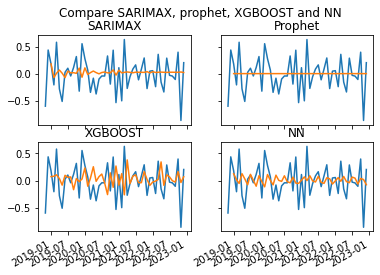

In [159]:

XGBOOST_df = pd.DataFrame({'y': XGBOOST_prediction.tolist()})
XGBOOST_df.index = y_test.index

NN_df = pd.DataFrame(NN_prediction)
NN_df.index = y_test.index
plt.figure(figsize=(20, 20))
fig, axs = plt.subplots(2, 2)
fig.suptitle('Compare SARIMAX, prophet, XGBOOST and NN')
axs[0, 0].plot(dataset_diff.tail(50))
axs[0, 0].plot(sarimax_prediction.tail(50))
axs[0, 0].set_title("SARIMAX")
axs[0, 1].plot(dataset_diff.tail(50))
axs[0, 1].plot(prophet_future.tail(50))
axs[0, 1].set_title("Prophet")
axs[1, 0].plot(dataset_diff.tail(50))
axs[1, 0].plot(XGBOOST_df.tail(50))
axs[1, 0].set_title("XGBOOST")
axs[1, 1].plot(dataset_diff.tail(50))
axs[1, 1].plot(NN_df.tail(50))
axs[1, 1].set_title("NN")

for ax in fig.get_axes():
    ax.label_outer()
fig.autofmt_xdate()

plt.savefig('Comparison',
            bbox_inches='tight', transparent=False)

# Part 8: Forecast the future

- We have established the XGBOOST model is the most accurate, and therefore we can use it to forcast the future COVID19 deaths i.e. beyond 15th May 2022.
- For the sake of exercise, we will apply all four models for the forecast.
- We will ask the four models to forecast 1 month into the future: from 16th May 2022 to 16th June 2022.
- Prediction with SARIMAX and fbprophet is straightforward:

In [43]:
sarimax_future_prediction = results.predict(start=dataset_diff.index[0], end='2027-01-01', dynamic=True)
future = m.make_future_dataframe(periods=test.shape[0]+5*12, freq='MS')

prophet_future_prediction = m.predict(future)
prophet_future_prediction.set_index('ds',inplace=True)

- For XGBOOST and NN, we need to generate the `X` dataset as we did before. We need to create a new function like `featurize()`, which takes a DataFrame of dates only.

In [44]:
def featurize_dates(t):
    X = pd.DataFrame()

    X['day'] = t.index.day
    X['month'] = t.index.month
    X['quarter'] = t.index.quarter
    X['dayofweek'] = t.index.dayofweek
    X['dayofyear'] = t.index.dayofyear
    X['weekofyear'] = t.index.weekofyear
    return X


Let's apply it on the `future` DataFrame we got from fbprophet to generate forecasts using the trained XGBOOST model:

In [45]:
future = future.set_index('ds')
X_future = featurize_dates(future)
scaled_future = scaler.transform(X_future)
XGBOOST_future = XGBOOST_model.predict(scaled_future)

We do the same for the NN:

In [46]:
NN_future = NN_model.predict(scaled_future)

Finally, let's plot the entire time series including training, test and future predictions:

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


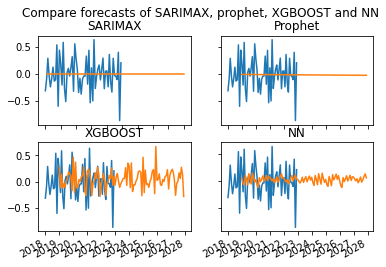

In [47]:

XGBOOST_df = pd.DataFrame({'y': XGBOOST_future.tolist()})
XGBOOST_df.index = future.index

NN_df = pd.DataFrame(NN_future)
NN_df.index = future.index

future_prediction_count = 5*12 + test.shape[0]

fig, axs = plt.subplots(2, 2)
fig.suptitle('Compare forecasts of SARIMAX, prophet, XGBOOST and NN')
axs[0, 0].plot(dataset_diff.tail(60))
axs[0, 0].plot(sarimax_future_prediction.tail(future_prediction_count))
axs[0, 0].set_title("SARIMAX")
axs[0, 1].plot(dataset_diff.tail(60))
axs[0, 1].plot(prophet_future_prediction['yhat'].tail(future_prediction_count))
axs[0, 1].set_title("Prophet")
axs[1, 0].plot(dataset_diff.tail(60))
axs[1, 0].plot(XGBOOST_df.tail(future_prediction_count))
axs[1, 0].set_title("XGBOOST")
axs[1, 1].plot(dataset_diff.tail(60))
axs[1, 1].plot(NN_df.tail(future_prediction_count))
axs[1, 1].set_title("NN")

for ax in fig.get_axes():
    ax.label_outer()
fig.autofmt_xdate()

plt.savefig('Comparison_forecasts',
            bbox_inches='tight', transparent=False)

Finally, you'd want to see the predictions plotted against the original data i.e. the data before differencing.

In [48]:
first_value = dataset.iloc[0].y
print(first_value)


0.379
